## Using MECSim
In this example we look at a simple example case of single electron trasnfer mechanism. We simulate Cyclic Voltametry response of this particualr mechanism with a planar electrode assumption.

In [1]:
from pymecsim import pysed, MECSIM

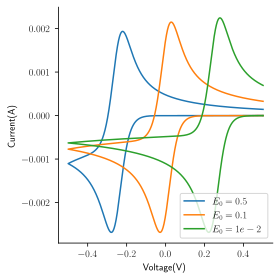

In [2]:
import pdb
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_formats = ['svg']
import os
import warnings
warnings.filterwarnings("ignore")

configfile  = '../mechanisms/cvexamples.sk'
E0 = [-0.25,0.0,0.25]
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)
dirname = os.getcwd()
for i,e0 in enumerate(E0):
    outfile = dirname + '/outfile.sk'
    pysed('$E0', str(e0), configfile, outfile)
    model = MECSIM(outfile)
    T = model.T
    forward_sweep = np.arange(len(T)/2,len(T)).astype(int)
    model.plot(ax=ax)
    ax.set_label("E0 = "+str(e0))
plt.legend([r'$E_0=0.5$',r'$E_0=0.1$',r'$E_0=1e-2$'],loc='lower right')
#plt.savefig('cvexample.png',dpi=500,bbox_inches='tight')
plt.show()

We can visualize the concentration profiles of the species in the bulk and at the surface. In this example, we simulated `A +1e = B` thus we have two species. Since this is a simple one step reaction mechanism and diffusin driven, we should see that increase in concentration of species `A` should lead to decrease in concentration of species `B` at the surface where the electron transfer takes place. Similarily in the bulk, one should observe similar behavior upuntil a `diffusion layer` length scale.

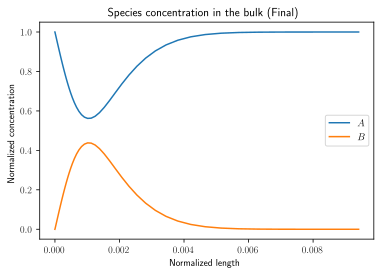

In [3]:
species = [r'$A$',r'$B$'] # in the same order as the mechanism
N = len(species)
C_bulk = model.get_bulk_concentrations()

fig, ax = plt.subplots()
for i in range(N):
    ax.plot(C_bulk[:,0], C_bulk[:,i+1], label=species[i])
ax.set_xlabel('Normalized length')
ax.set_ylabel('Normalized concentration')
ax.legend()
ax.set_title('Species concentration in the bulk (Final)')
plt.show()

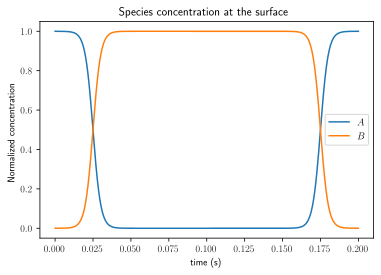

In [4]:
species = [r'$A$',r'$B$'] # in the same order as the mechanism
N = len(species)
C_surface = model.get_surface_concentrations()

fig, ax = plt.subplots()
for i in range(N):
    ax.plot(model.T, C_surface[1:,i], label=species[i])
ax.set_xlabel('time (s)')
ax.set_ylabel('Normalized concentration')
ax.legend()
ax.set_title('Species concentration at the surface')
plt.show()